# Predicting Breast Cancer Early Before It Happens
**Applying CRISP-DM process to solve human disease**

# Section 1 : Business Understanding

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the world and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.<br>
I got interested in cancer research so to better understand about the method prediction cancer.<br>
For detect how should do better, we shall dig threes below questions:
1. Which features are most helpful in predicting malignant or benign cancer? Which features are not helpful in predicting malignant or benign cancer?
1. How do different models predict cancer diagnosis?
1. What is the best models predict?

# Section 2 : Data Understanding

**Declare some libs to run code**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Gather Data 

**We will start by loading data**

In [2]:
df = pd.read_csv('../input/udacity-dsnano-intro/wisconsinbreastcancer_data.csv')

**Next see all header of dataset**

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Next see the detail of dataset**

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Because id cannot be used for classification so we can drop the column**

In [5]:
#Since ID cannot be used for classification we can drop the column
df.drop('id',axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**So can run analysis need change value of main column diagnosis**

In [6]:
# changing M→1；B→0 
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploring Data 

**Calculate the rate of 'Benign', 'Malignant'**

([<matplotlib.patches.Wedge at 0x7f3af47b4390>,
 [Text(-0.44813900450084804, 1.0590899077250189, 'Benign'),
  Text(0.4481389053416925, -1.0590899496828161, 'Malignant')],
 [Text(-0.21432734997866643, 0.5065212602163134, '62.7%'),
  Text(0.2143273025547225, -0.5065212802830859, '37.3%')])

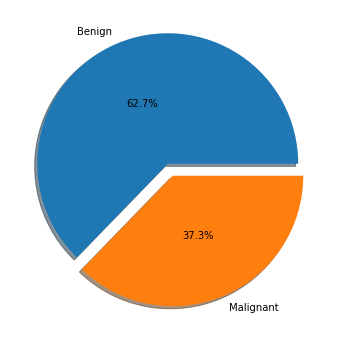

In [7]:
#groupby the data by delivery type and show pie
data = df.groupby("diagnosis")["diagnosis"].count()

pie, ax = plt.subplots(figsize=[10,6])
labels = 'Benign', 'Malignant'
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels,  shadow=True, pctdistance=0.5)

**After checking various aspects like null values count, missing values count, and info. 
This dataset is perfect because of no Nul and missing values.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Create Mean, Squared Error, and Worst Features dataset to evaluate**

In [9]:
#Extracting Mean, Squared Error, and Worst Features
df_mean = df[df.columns[:11]]
df_se = df.drop(df.columns[1:11], axis=1)
df_se = df_se.drop(df_se.columns[11:], axis=1)
df_worst = df.drop(df.columns[1:21], axis=1)

**Understand correlation of mean features with target variable**

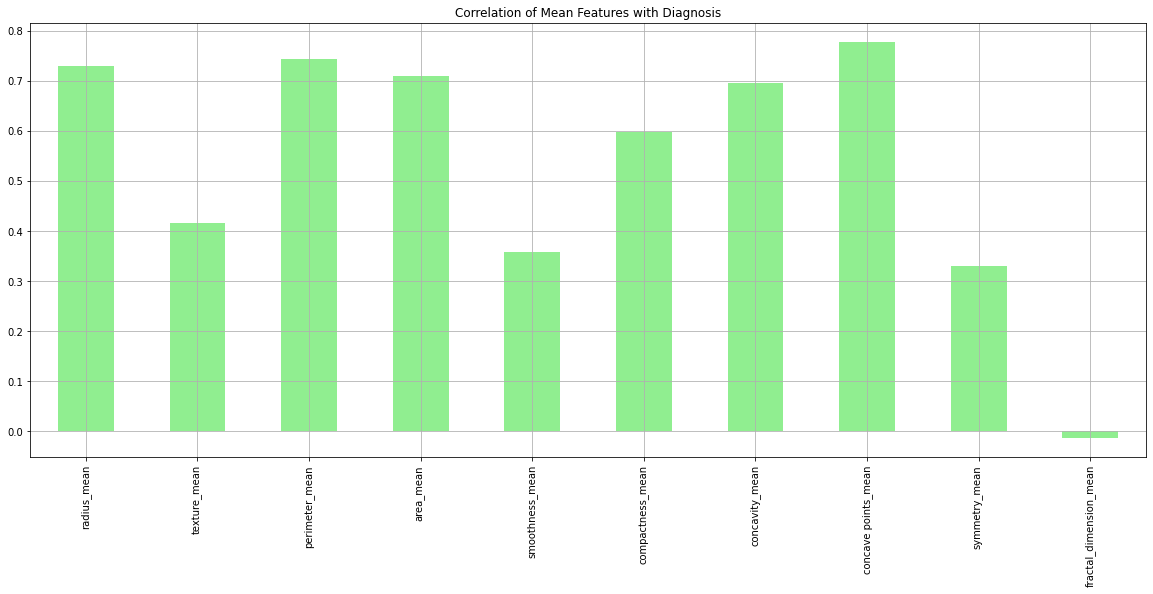

In [10]:
plt.figure(figsize=(20, 8))
df_mean.drop('diagnosis', axis=1).corrwith(df_mean.diagnosis).plot(kind='bar', grid=True, title="Correlation of Mean Features with Diagnosis", color="lightgreen");

#fractal_dimension_mean least correlated with the target variable.
#All other mean features have a significant correlation with the target variable.

**Understand correlation of squared error features with target variable**

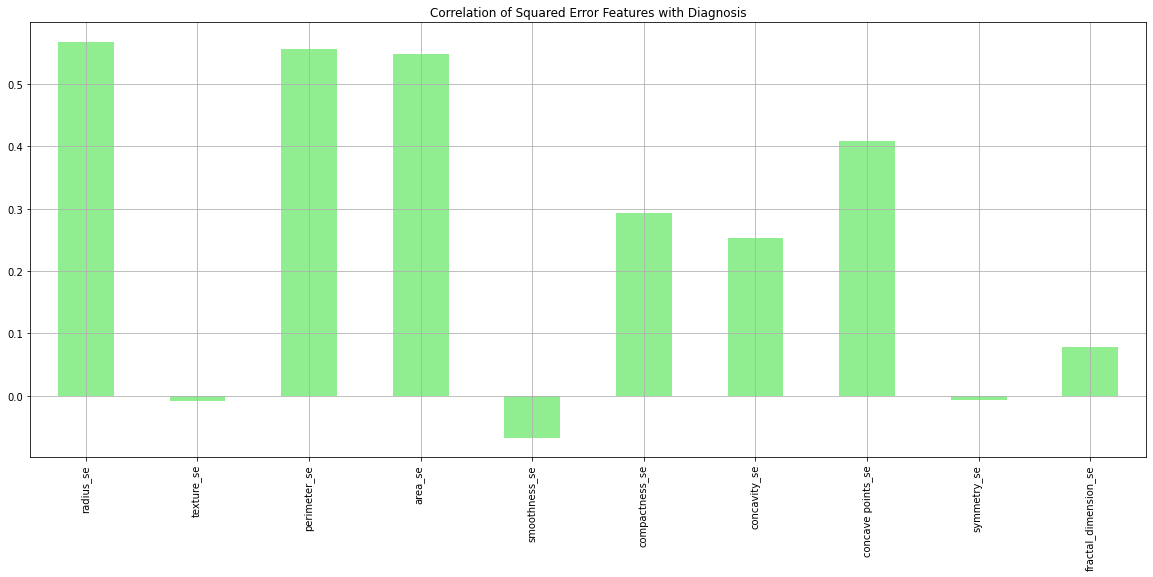

In [11]:
plt.figure(figsize=(20, 8))
df_se.drop('diagnosis', axis=1).corrwith(df_se.diagnosis).plot(kind='bar', grid=True, title="Correlation of Squared Error Features with Diagnosis", color="lightgreen");
#texture_se, smoothness_se, symmetry_se, and fractal_dimension_se are least correlated with the target variable.
#All other squared error features have a significant correlation with the target variable.

**Understand correlation of worst error features with target variable** 

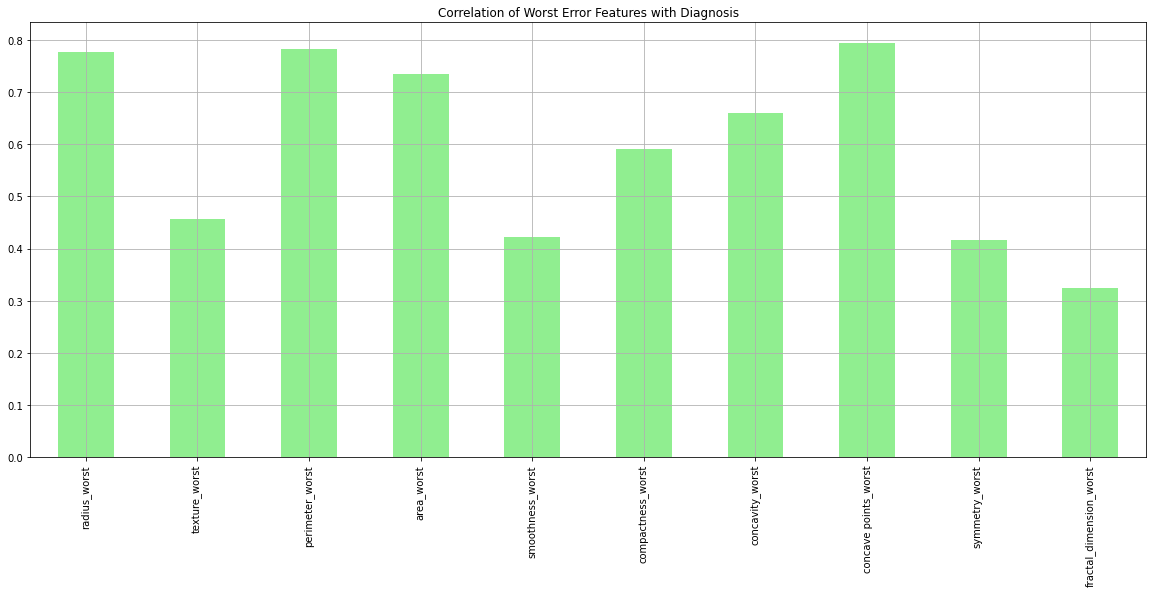

In [12]:
plt.figure(figsize=(20, 8))
df_worst.drop('diagnosis', axis=1).corrwith(df_worst.diagnosis).plot(kind='bar', grid=True, title="Correlation of Worst Error Features with Diagnosis", color="lightgreen");
#All worst features have a significant correlation with the target variable.

**Extracting Mean, Squared Error, and Worst Features columns**


In [13]:
df_mean_cols = list(df.columns[1:11])
df_se_cols = list(df.columns[11:21])
df_worst_cols = list(df.columns[21:])

**Split into two Parts Based on Diagnosis**


In [14]:
dfM = df[df['diagnosis'] == 1]
dfB = df[df['diagnosis'] == 0]

**Distribution based on Nucleus and Diagnosis:**

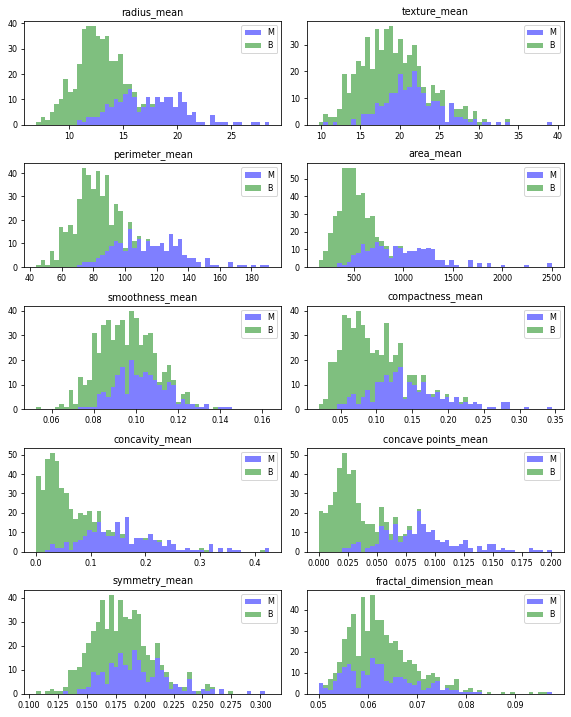

In [15]:
#Mean Features vs Diagnosis:

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(df[df_mean_cols[idx]]) - min(df[df_mean_cols[idx]])) / 50
    ax.hist([dfM[df_mean_cols[idx]], dfB[df_mean_cols[idx]]],
            bins=np.arange(min(df[df_mean_cols[idx]]), max(df[df_mean_cols[idx]]) + binwidth, binwidth), alpha=0.5,
            stacked=True, label=['M', 'B'], color=['b', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(df_mean_cols[idx])
plt.tight_layout()
plt.show()

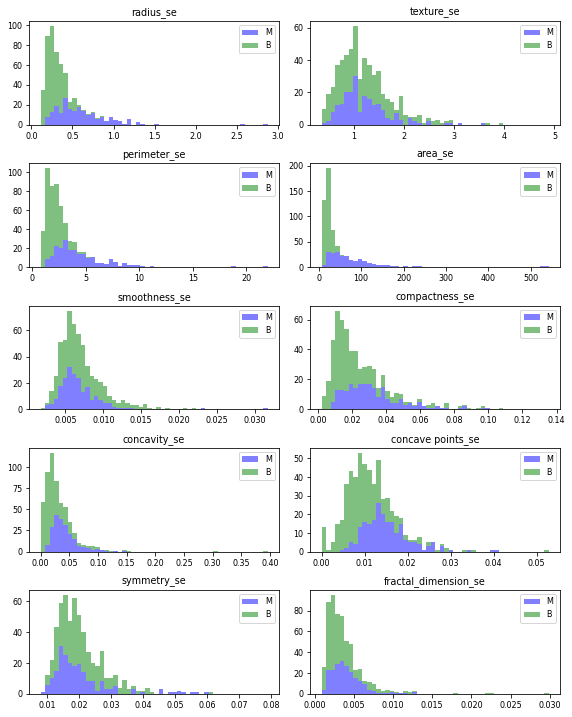

In [16]:
#Squared Error Features vs Diagnosis:

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(df[df_se_cols[idx]]) - min(df[df_se_cols[idx]])) / 50
    ax.hist([dfM[df_se_cols[idx]], dfB[df_se_cols[idx]]],
            bins=np.arange(min(df[df_se_cols[idx]]), max(df[df_se_cols[idx]]) + binwidth, binwidth), alpha=0.5,
            stacked=True, label=['M', 'B'], color=['b', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(df_se_cols[idx])
plt.tight_layout()
plt.show()


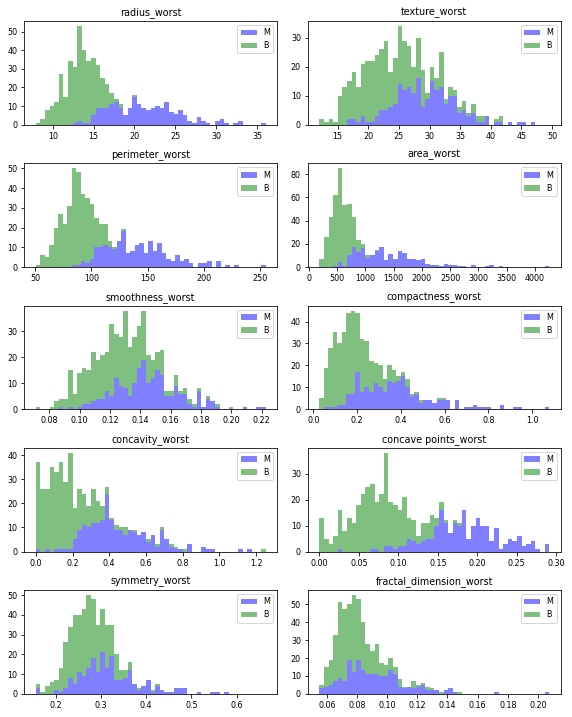

In [17]:
#Worst Features vs Diagnosis:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(df[df_worst_cols[idx]]) - min(df[df_worst_cols[idx]])) / 50
    ax.hist([dfM[df_worst_cols[idx]], dfB[df_worst_cols[idx]]],
            bins=np.arange(min(df[df_worst_cols[idx]]), max(df[df_worst_cols[idx]]) + binwidth, binwidth), alpha=0.5,
            stacked=True, label=['M', 'B'], color=['b', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(df_worst_cols[idx])
plt.tight_layout()
plt.show()

**Checking Multicollinearity Between Distinct Features:**

**Mean Features:**


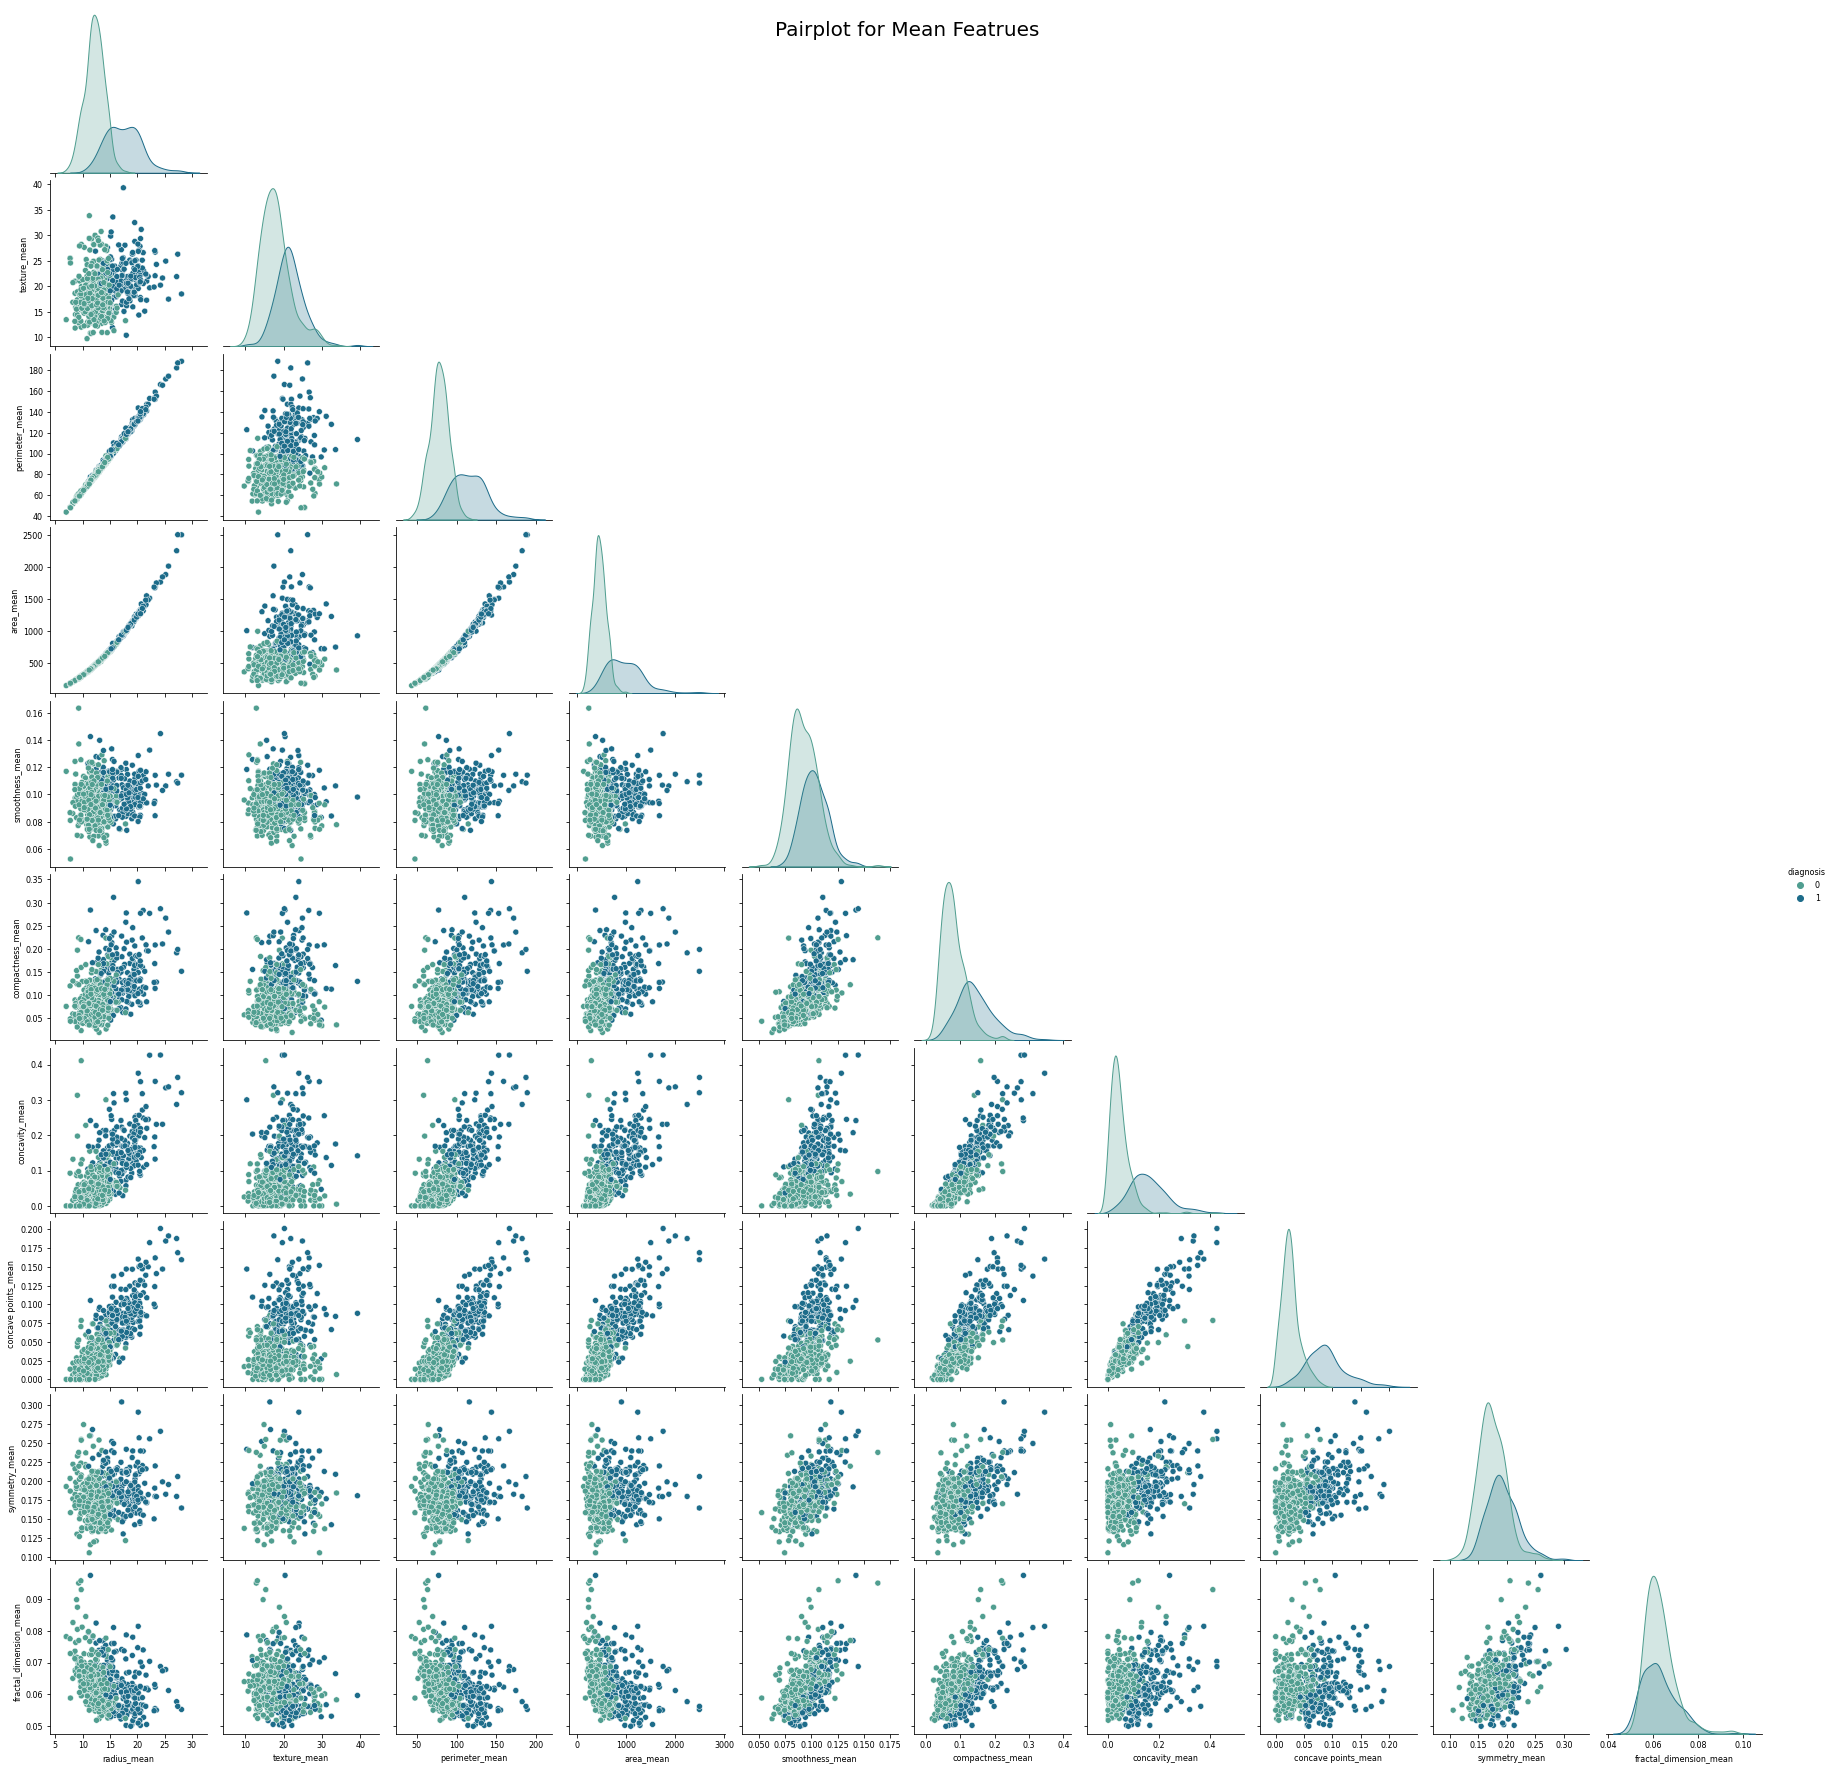

In [18]:
def pairplot(dfx):
    '''
    returns multiple pairwise bivariate distributions plot according to type(mean, squared error, worst) dataset
    input:
          dfx: dataset which want to plot
    ouput: n/a
    
    '''
    import seaborn as sns
    name = str([x for x in globals() if globals()[x] is dfx][0])
    if name == 'df_mean':
        x = "Mean"
    elif name == 'df_se':
        x = "Squared Error"
    elif name == 'df_worst':
        x = "Worst"
    sns.pairplot(data=dfx, hue='diagnosis', palette='crest', corner=True).fig.suptitle('Pairplot for {} Featrues'.format(x), fontsize = 20)
    
#Mean Features:
pairplot(df_mean)

**Squared Error Features:**

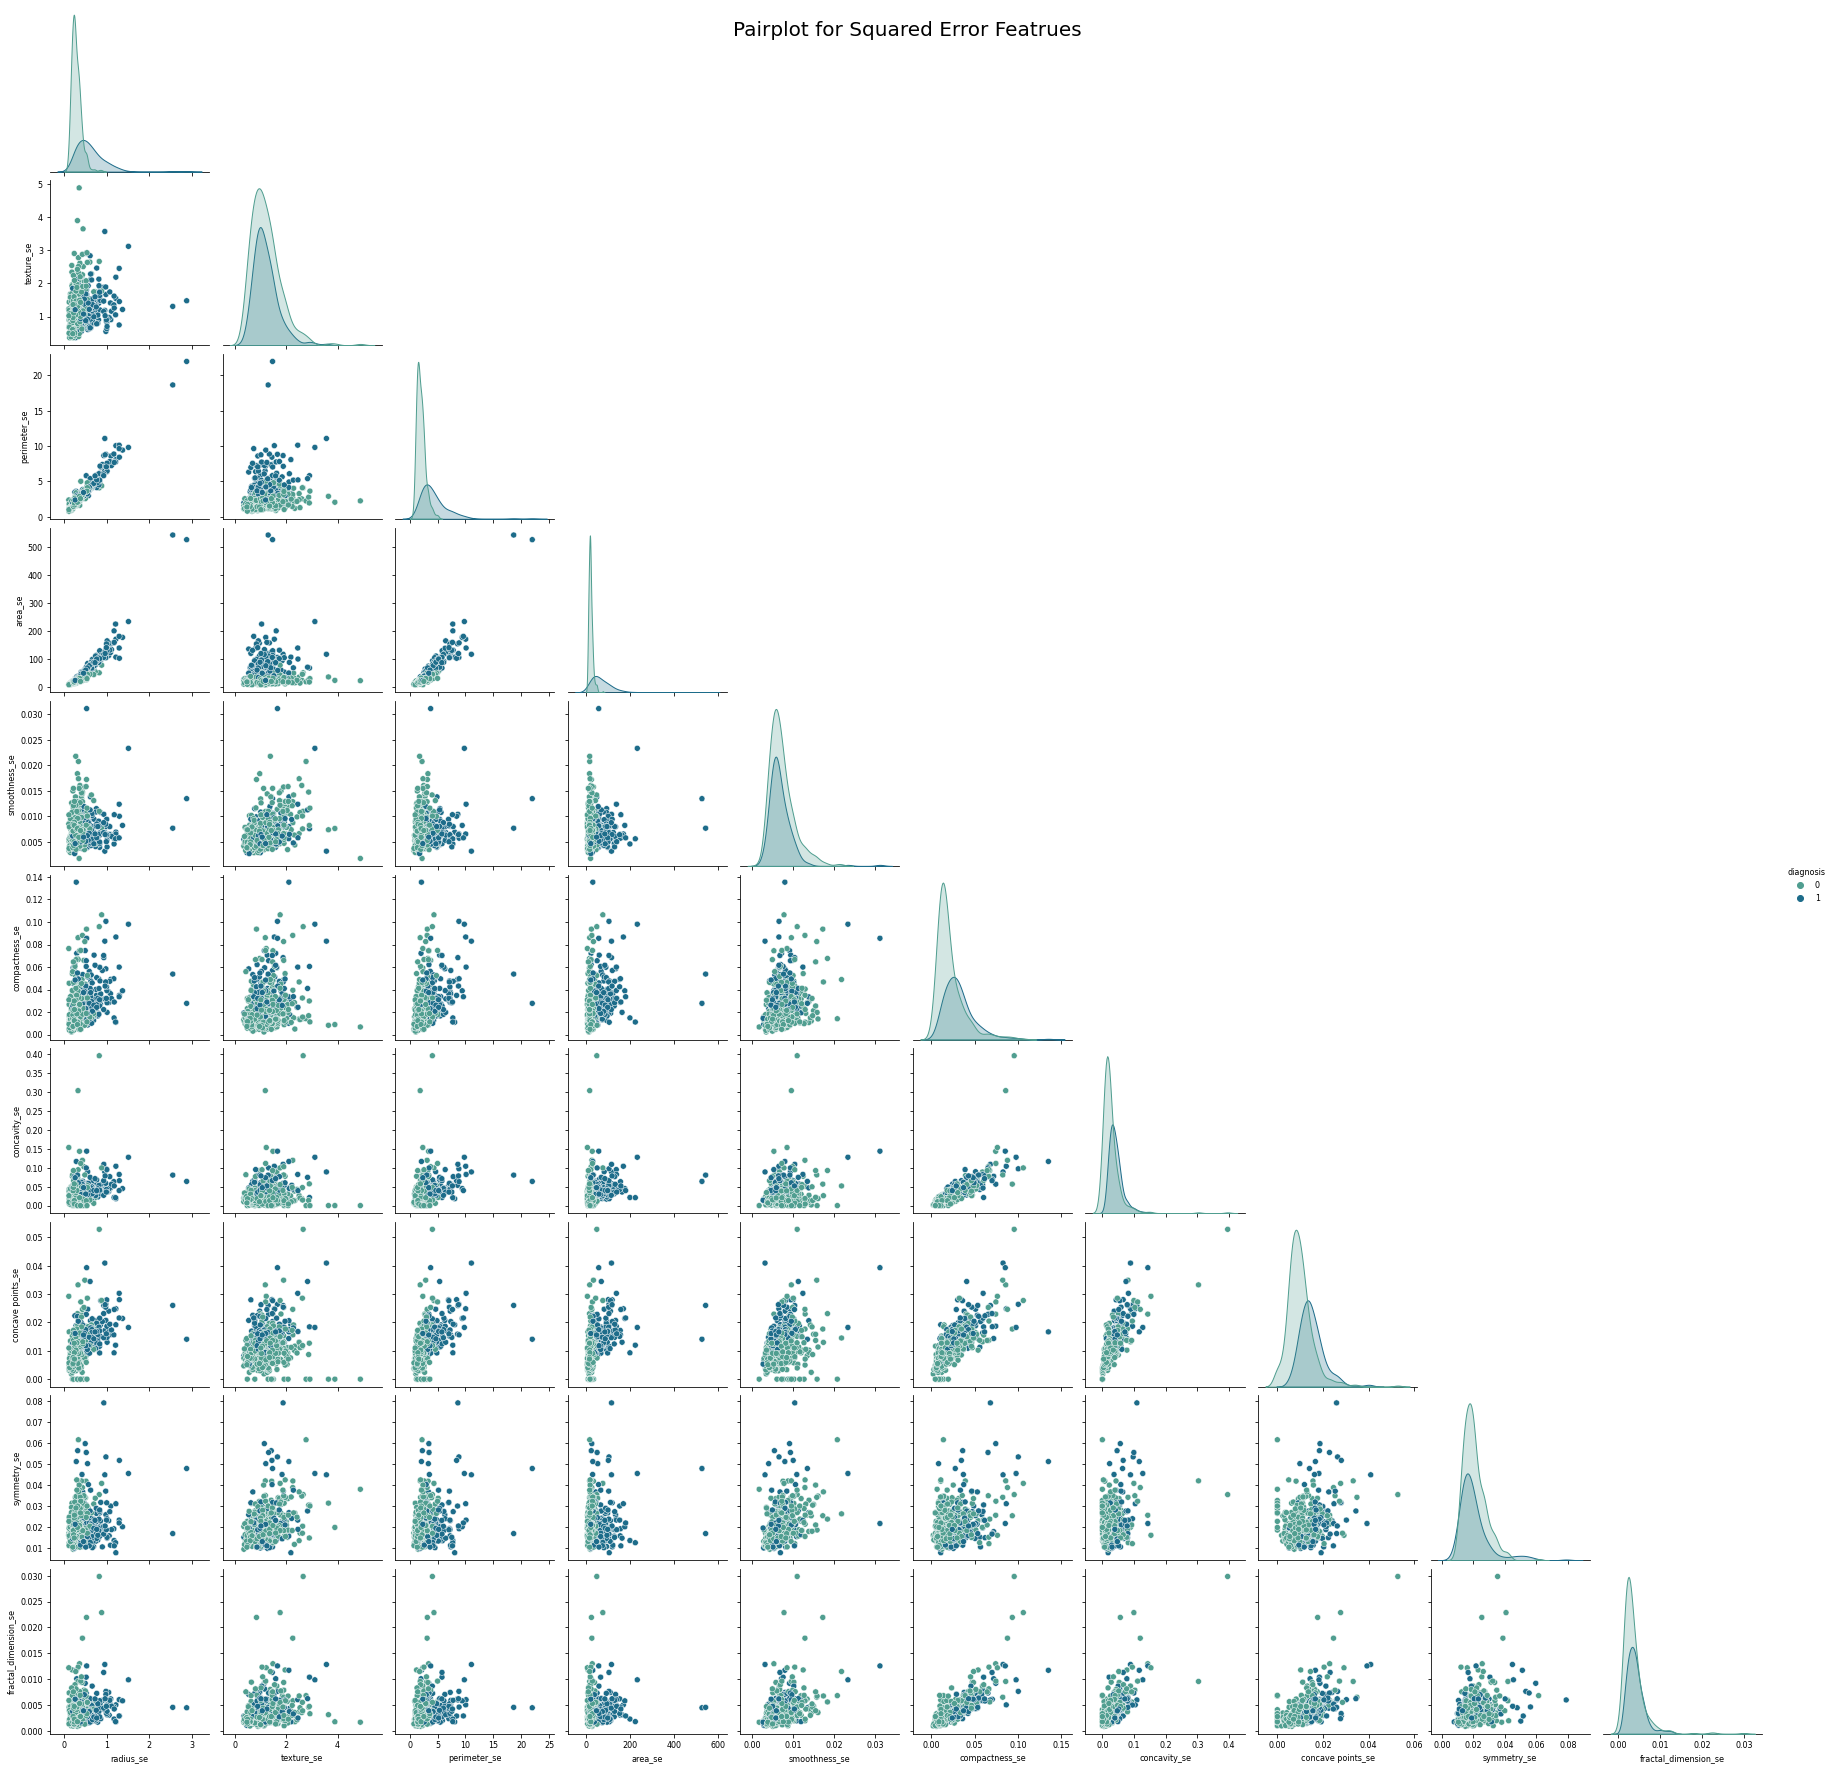

In [19]:
#Squared Error Features:
pairplot(df_se)

**Worst Features:**


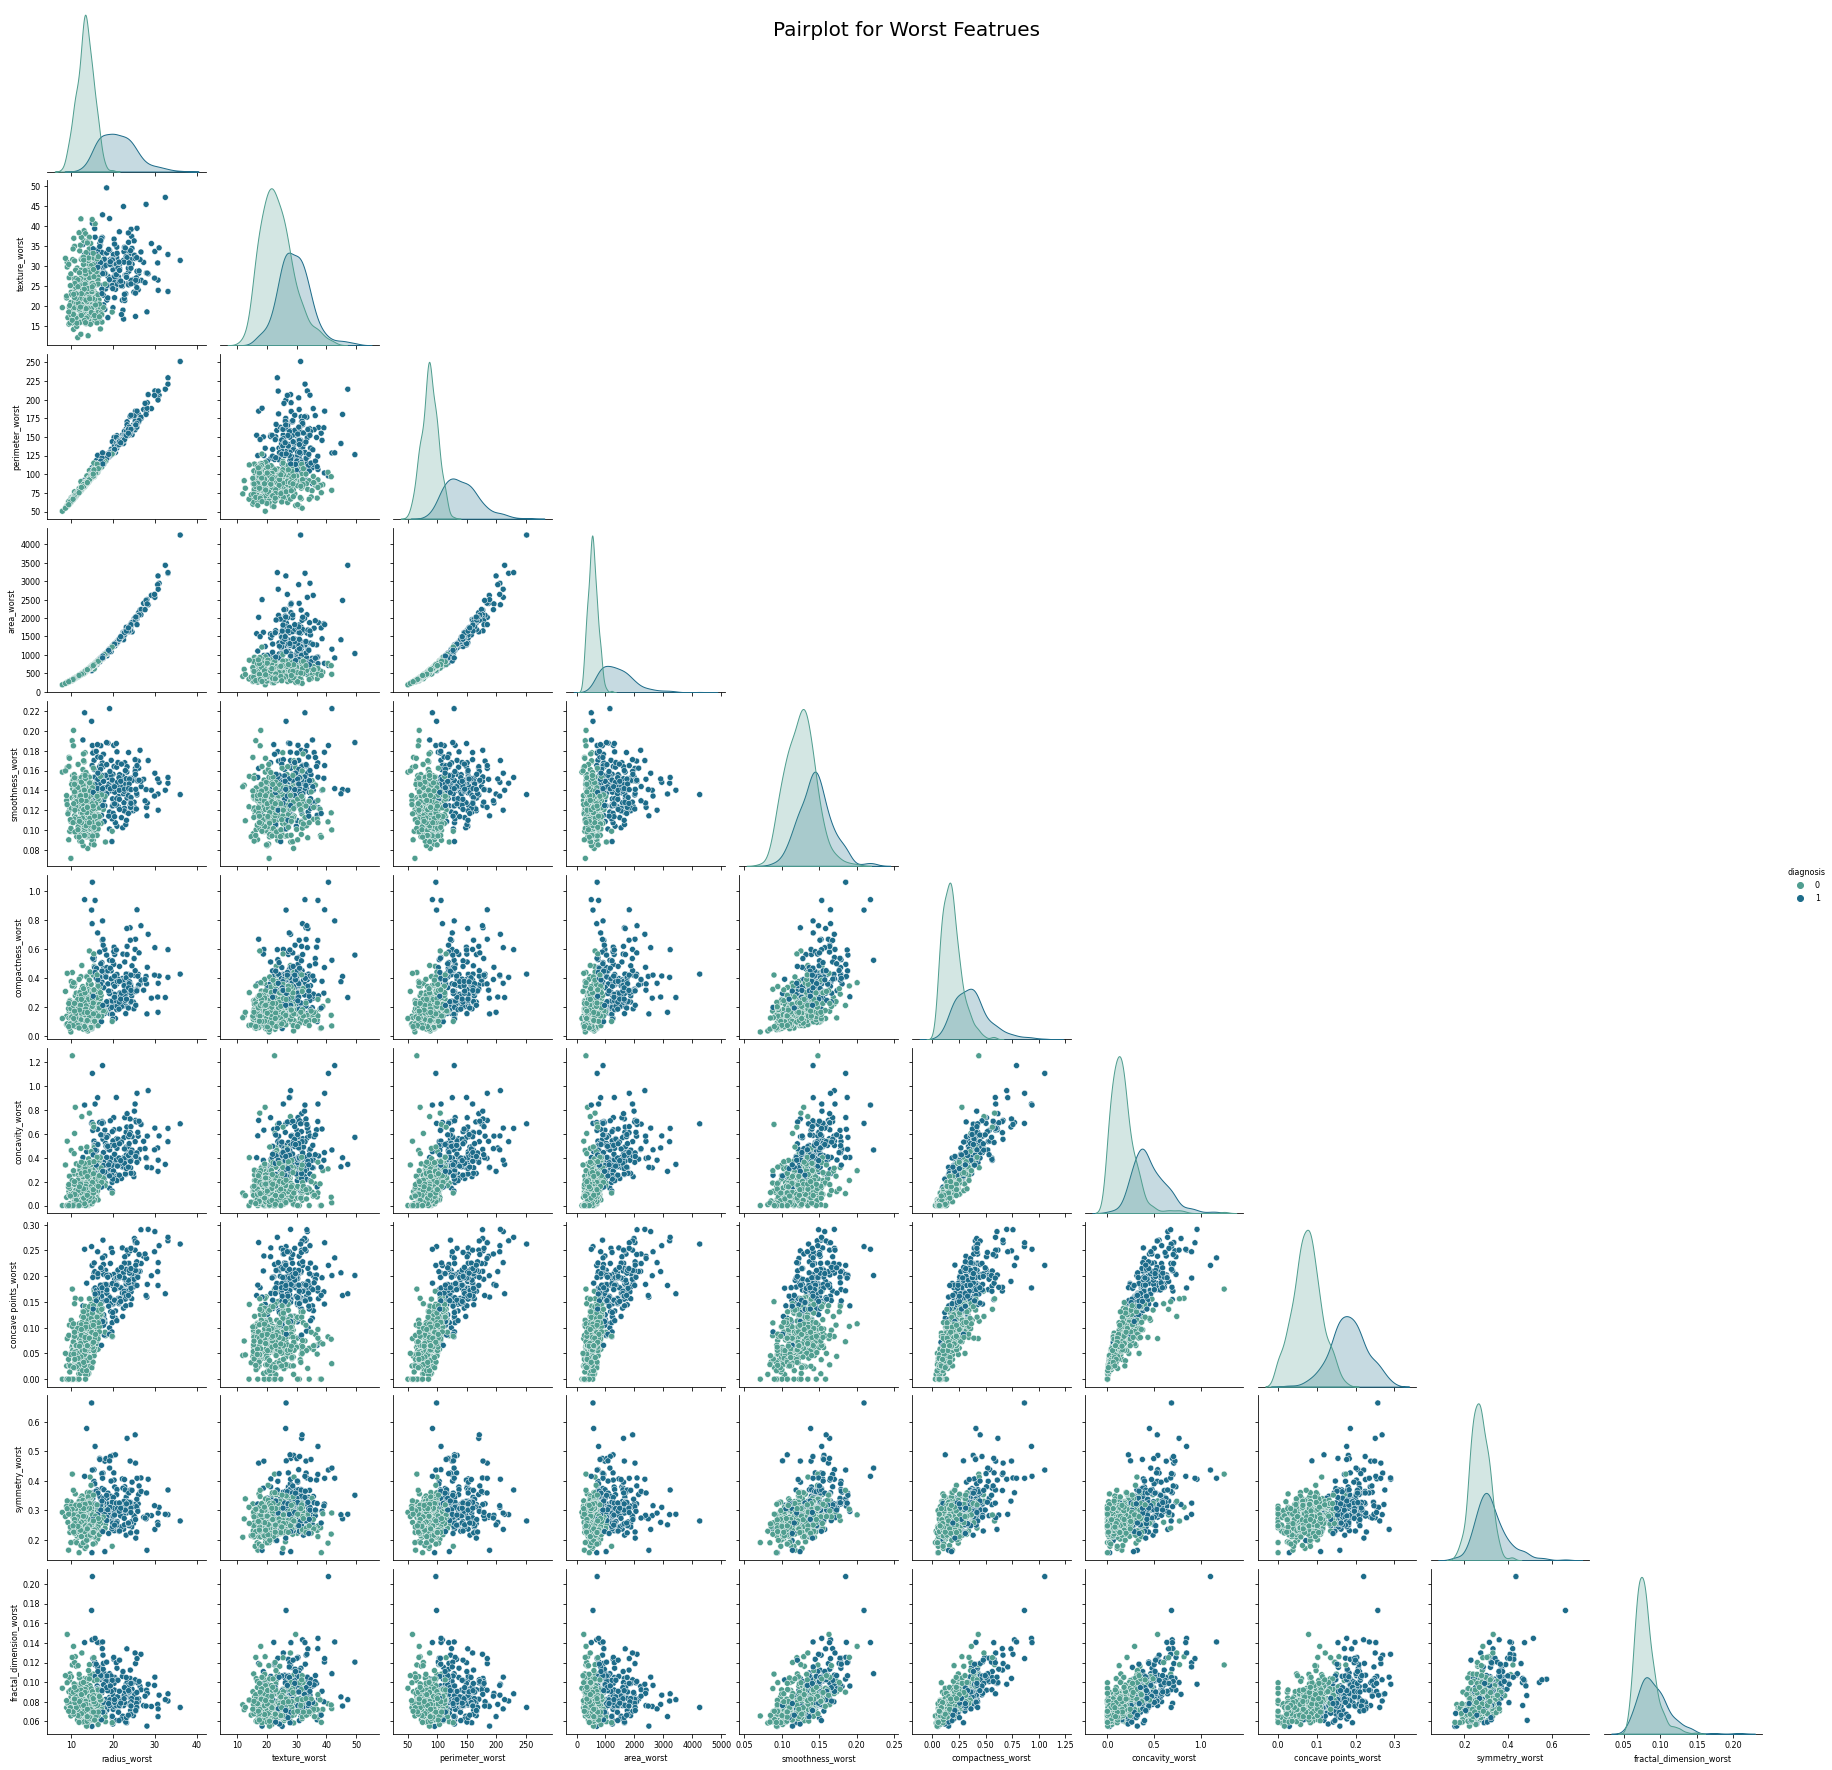

In [20]:
#Worst Features:
pairplot(df_worst)

**Correlation Heatmap between Nucleus Feature:**

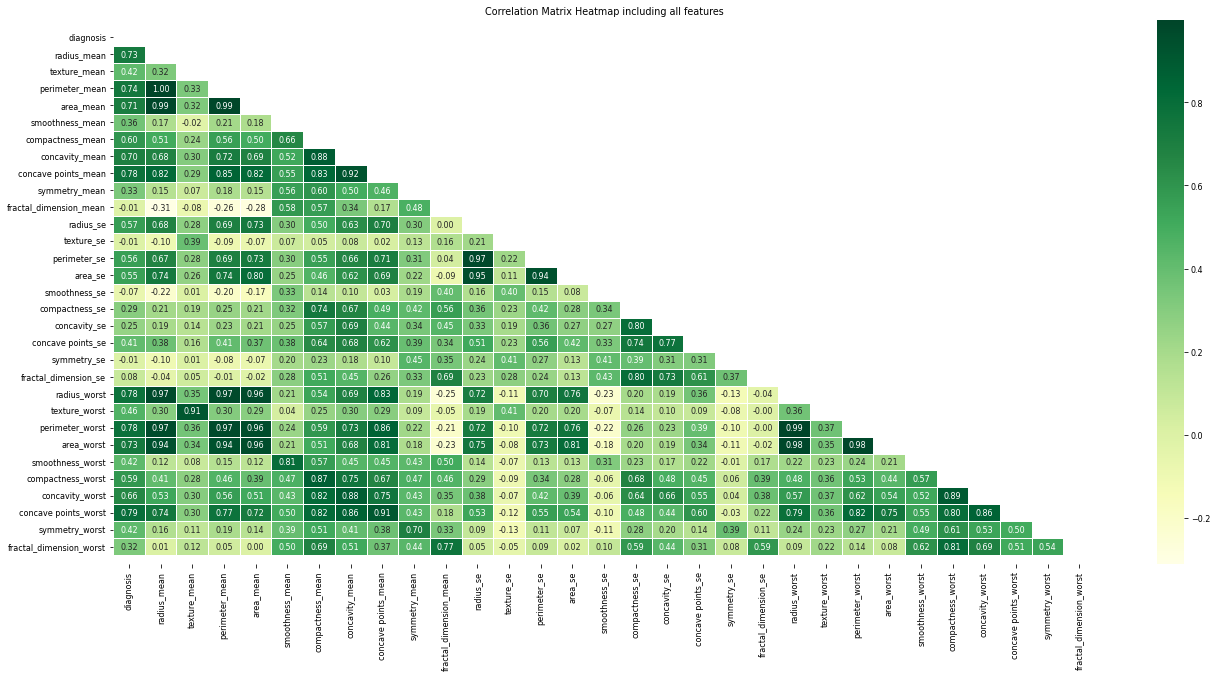

In [21]:
#Correlation Heatmap between Nucleus Feature:
corr_matrix = df.corr()  # Correlation Matrix

# Mask for Heatmap
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(corr_matrix)] = True

# Correlation Matrix Heatmap including all features
fig, ax = plt.subplots(figsize=(22, 10))
ax = sbn.heatmap(corr_matrix, mask=mask, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title("Correlation Matrix Heatmap including all features");
fig.savefig('Correlation_Heatmap_1.png')

# Conclusion of exploring
**#1**. None of the histograms show any noticeable large outliers so there is no need for further cleaning of data  
**#2**. Values of radius, perimeter, area, compactness, concavity and concave points can be potentially used for classification as the larger values of these parameters shows a high correlation with malignant tumors.  
**#3**. No noticeable trends can be observed from texture, smoothness, symmetry or fractal dimension  
**#4**. We can use mean values for our classification


# Section 3 : Data Preparation

**Question 1: Which features are most helpful in predicting malignant or benign cancer? Which features are not helpful in predicting malignant or benign cancer?**

# Clean data
**Base on above conclusion we will clean data by retain/remove some helpful/redundant columns to jump to prediction steps**

In [22]:
df_bk = df #bk
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

**After cleaning recheck Correlation Heatmap between Nucleus Feature**

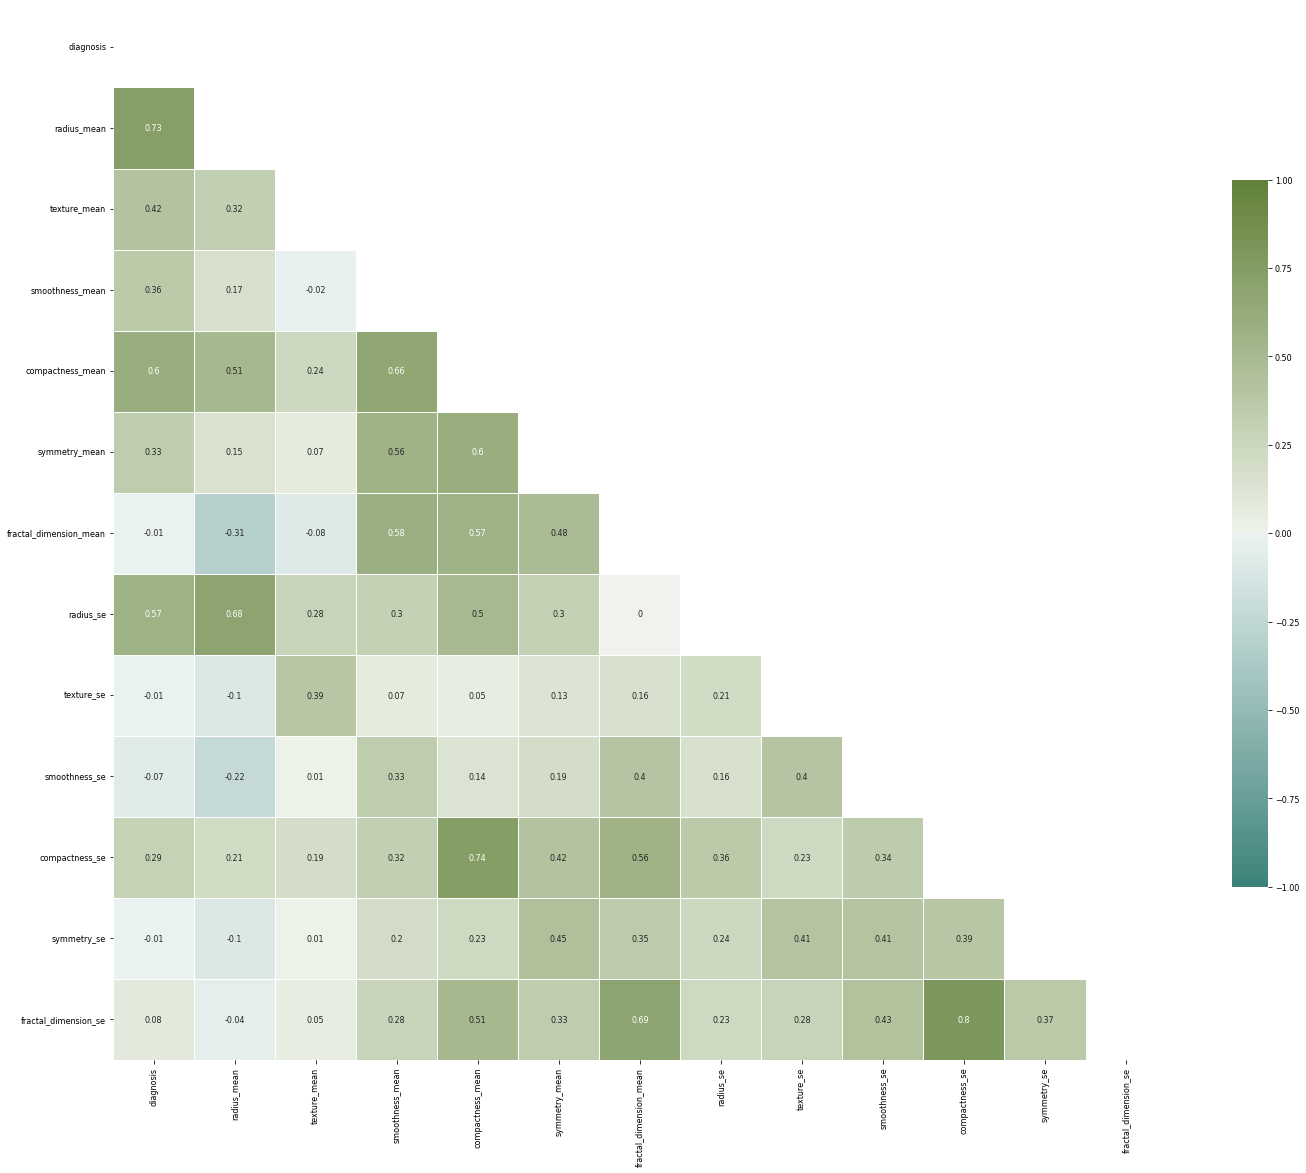

In [23]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sbn.diverging_palette(180, 110, as_cmap=True)

f, ax = plt.subplots(figsize=(20, 20))
sbn.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()
plt.savefig('Correlation_Heatmap_2.png')

# Section 4 : Data Modeling

# Init Model 

**Now we shall some models to process the prediction**

In [24]:
#Model building
# For original analysis
X_origin = df_bk
y_origin = df_bk['diagnosis']
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X_origin, y_origin, test_size=0.3, random_state=40)

# For cleaned analysis
X = df
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Analyse and fit model

**❶Logistic regression**

In [25]:
# importing the model
from sklearn.linear_model import LogisticRegression

# initiating the common model
model_lr = LogisticRegression(max_iter=3000)

## Orginal data
# initiating the model
print("----------ORIGINAL------------") 
model_lr_origin = model_lr
model_lr_origin.fit(X_train_origin, y_train_origin)

# model predictions
y_predict_lr_origin = model_lr_origin.predict(X_test_origin)

# accuracy score
print(accuracy_score(y_train_origin, model_lr_origin.predict(X_train_origin)))
accuracy_lr_origin = accuracy_score(y_test_origin, y_predict_lr_origin)
print(accuracy_lr_origin)

# confusion matrix
print(confusion_matrix(y_test_origin, y_predict_lr_origin))

# classification report
print(classification_report(y_test_origin, y_predict_lr_origin))

## Cleaned data
print("----------CLEANED------------") 
model_lr.fit(X_train, y_train)

# model predictions
y_predict_lr = model_lr.predict(X_test)

# accuracy score
print(accuracy_score(y_train, model_lr.predict(X_train)))
accuracy_lr = accuracy_score(y_test, y_predict_lr)
print(accuracy_lr)

# confusion matrix
print(confusion_matrix(y_test, y_predict_lr))

# classification report
print(classification_report(y_test, y_predict_lr))

----------ORIGINAL------------
0.9974874371859297
0.9941520467836257
[[114   1]
 [  0  56]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.98      1.00      0.99        56

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171

----------CLEANED------------
1.0
1.0
[[115   0]
 [  0  56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        56

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



**❷Random Forest**

In [26]:
# importing the model
from sklearn.ensemble import RandomForestClassifier

# initiating the common model
model_rf = RandomForestClassifier(criterion = 'entropy', 
                                  max_depth = 10, 
                                  max_features = 'auto', 
                                  min_samples_leaf = 2, 
                                  min_samples_split = 3, 
                                  n_estimators = 130)

## Orginal data
# initiating the model
print("----------ORIGINAL------------") 
model_rf_origin = model_rf
model_rf_origin.fit(X_train_origin, y_train_origin)

# model predictions 
y_predict_rf_origin = model_rf_origin.predict(X_test_origin)

# accuracy score
print(accuracy_score(y_train_origin, model_rf_origin.predict(X_train_origin)))
accuracy_rf_origin = accuracy_score(y_test_origin, y_predict_rf_origin)
print(accuracy_rf_origin)

# confusion matrix
print(confusion_matrix(y_test_origin, y_predict_rf_origin))

# classification report
print(classification_report(y_test_origin, y_predict_rf_origin))

## Cleaned data
print("----------CLEANED------------") 
model_rf.fit(X_train, y_train)

# model predictions 
y_predict_rf = model_rf.predict(X_test)

# accuracy score
print(accuracy_score(y_train, model_rf.predict(X_train)))
accuracy_rf = accuracy_score(y_test, y_predict_rf)
print(accuracy_rf)

# confusion matrix
print(confusion_matrix(y_test, y_predict_rf))

# classification report
print(classification_report(y_test, y_predict_rf))

----------ORIGINAL------------
1.0
0.9883040935672515
[[114   1]
 [  1  55]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       115
           1       0.98      0.98      0.98        56

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

----------CLEANED------------
1.0
1.0
[[115   0]
 [  0  56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        56

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



**❸KNN**

In [27]:
# importing the model
from sklearn.neighbors import KNeighborsClassifier

# initiating the common model
model_knn = KNeighborsClassifier(algorithm='auto',
                                 leaf_size=30,
                                 metric='minkowski',
                                 p=2, # p=2 is equivalent to euclidian distance
                                 metric_params=None,
                                 n_jobs=1,
                                 n_neighbors=5,
                                 weights='uniform')

## Orginal data
# initiating the model
print("----------ORIGINAL------------") 
model_knn_origin = model_knn
model_knn_origin.fit(X_train_origin, y_train_origin)

# model predictions 
y_predict_knn_origin = model_knn_origin.predict(X_test_origin)

# accuracy score
print(accuracy_score(y_train_origin, model_knn_origin.predict(X_train_origin)))
accuracy_knn_origin = accuracy_score(y_test_origin, y_predict_knn_origin)
print(accuracy_knn_origin)

# confusion matrix
print(confusion_matrix(y_test_origin, y_predict_knn_origin))

# classification report
print(classification_report(y_test_origin, y_predict_knn_origin))


## Cleaned data
print("----------CLEANED------------") 
model_knn.fit(X_train, y_train)

# model predictions 
y_predict_knn = model_knn.predict(X_test)

# accuracy score
print(accuracy_score(y_train, model_knn.predict(X_train)))
accuracy_knn = accuracy_score(y_test, y_predict_knn)
print(accuracy_knn)

# confusion matrix
print(confusion_matrix(y_test, y_predict_knn))

# classification report
print(classification_report(y_test, y_predict_knn))

----------ORIGINAL------------
0.9447236180904522
0.9415204678362573
[[112   3]
 [  7  49]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       115
           1       0.94      0.88      0.91        56

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

----------CLEANED------------
0.9748743718592965
0.9415204678362573
[[112   3]
 [  7  49]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       115
           1       0.94      0.88      0.91        56

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



**❹SVMs**

In [28]:
# importing the model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# try first model 1
model_svc = SVC(probability=True) #0.93       

# try second model 2
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(model_svc, parameters)
grid_search.fit(X_train, y_train)

# best parameters
grid_search.best_params_ #{'C': 0.5, 'gamma': 0.0001}

model_svc_1 = SVC(C = 0.5, gamma = 0.0001, probability=True) #0.94       

# try third model 3 -> selected
model_svc_2 = SVC(C=100.0,probability=True) #0.95  


## Orginal data
# initiating the model
print("----------ORIGINAL------------") 
model_svc_2_origin = model_svc_2
model_svc_2_origin.fit(X_train_origin, y_train_origin)

# model predictions 
y_pred_svc_origin = model_svc_2_origin.predict(X_test_origin)

# accuracy score
print(accuracy_score(y_train_origin, model_svc_2_origin.predict(X_train_origin)))
accuracy_svc_origin = accuracy_score(y_test_origin, y_pred_svc_origin)
print(accuracy_svc_origin)

# confusion matrix
print(confusion_matrix(y_test_origin, y_pred_svc_origin))

# classification report
print(classification_report(y_test_origin, y_pred_svc_origin))

## Cleaned data
print("----------CLEANED------------") 
model_svc_2.fit(X_train, y_train)

# model predictions 
y_pred_svc = model_svc_2.predict(X_test)

# accuracy score
print(accuracy_score(y_train, model_svc_2.predict(X_train)))
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(accuracy_svc)

# confusion matrix
print(confusion_matrix(y_test, y_pred_svc))

# classification report
print(classification_report(y_test, y_pred_svc))

----------ORIGINAL------------
0.9271356783919598
0.9473684210526315
[[113   2]
 [  7  49]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       115
           1       0.96      0.88      0.92        56

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

----------CLEANED------------
1.0
1.0
[[115   0]
 [  0  56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        56

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



# Section 5: Evaluate the Results

**Question 2: How do different models predict cancer diagnosis?**

**After analysis each model now we collect it together to compare** 

In [29]:
print("----------ORIGINAL------------") 
models_origin = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'KNN', 'SVM'],
    'Score': [100*round(accuracy_lr_origin,4), 100*round(accuracy_rf_origin,4), 100*round(accuracy_knn_origin,4), 100*round(accuracy_svc_origin,4)]
})
print(models_origin.sort_values(by = 'Score', ascending = False))
print("----------CLEANED------------") 
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'KNN', 'SVM'],
    'Score': [100*round(accuracy_lr,4), 100*round(accuracy_rf,4), 100*round(accuracy_knn,4), 100*round(accuracy_svc,4)]
})
print(models.sort_values(by = 'Score', ascending = False))

----------ORIGINAL------------
                      Model  Score
0       Logistic Regression  99.42
1  Random Forest Classifier  98.83
3                       SVM  94.74
2                       KNN  94.15
----------CLEANED------------
                      Model   Score
0       Logistic Regression  100.00
1  Random Forest Classifier  100.00
3                       SVM  100.00
2                       KNN   94.15


**Question 3: What is the best models predict?**

**Next we visualise the result to understand better and find out the best model**

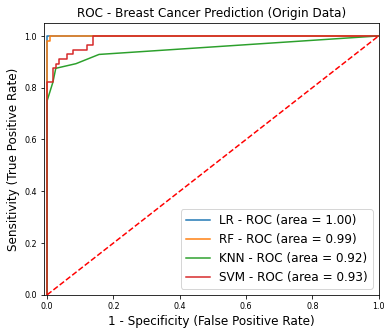

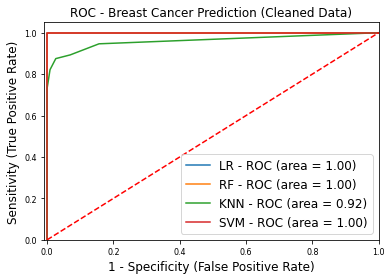

In [30]:
from sklearn import metrics

plt.figure(figsize=(6,5))

models_origin = [
{
    'label': 'LR',
    'model_origin': model_lr_origin,
},
{
    'label': 'RF',
    'model_origin': model_rf_origin,
},
{
    'label': 'KNN',
    'model_origin': model_knn_origin,
},
{
    'label': 'SVM',
    'model_origin': model_svc_2_origin,
}   
]

for m in models_origin:
    model_origin = m['model_origin'] 
    model_origin.fit(X_train_origin, y_train_origin) 
    y_pred_origin=model_origin.predict(X_test_origin) 
    fpr1_origin, tpr1_origin, thresholds_origin = metrics.roc_curve(y_test_origin, model_origin.predict_proba(X_test_origin)[:,1])
    auc_origin = metrics.roc_auc_score(y_test_origin,model_origin.predict(X_test_origin))
    plt.plot(fpr1_origin, tpr1_origin, label='%s - ROC (area = %0.2f)' % (m['label'], auc_origin))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction (Origin Data)', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig('Comparison_model_1.png')
plt.show()

models = [
{
    'label': 'LR',
    'model': model_lr,
},
{
    'label': 'RF',
    'model': model_rf,
},
{
    'label': 'KNN',
    'model': model_knn,
},
{
    'label': 'SVM',
    'model': model_svc_2,
}   
]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction (Cleaned Data)', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig('Comparison_model_2.png')

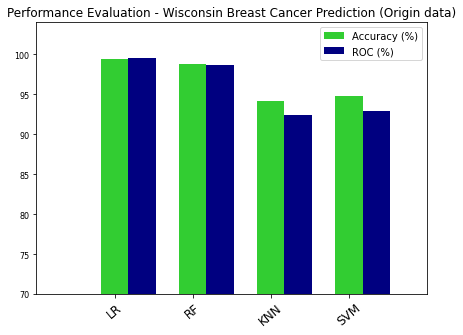

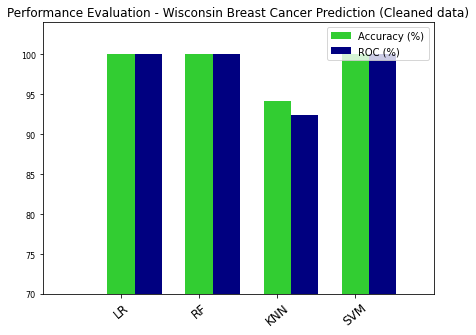

In [31]:
means_roc_origin = []
means_accuracy_origin = [100*round(accuracy_lr_origin,4), 100*round(accuracy_rf_origin,4), 100*round(accuracy_knn_origin,4), 100*round(accuracy_svc_origin,4)]

for m in models_origin:
    model_origin = m['model_origin'] 
    model_origin.fit(X_train_origin, y_train_origin) 
    y_pred_origin=model_origin.predict(X_test_origin) 
    fpr1_origin, tpr1_origin, thresholds_origin = metrics.roc_curve(y_test_origin, model_origin.predict_proba(X_test_origin)[:,1])
    auc_origin = metrics.roc_auc_score(y_test_origin,model_origin.predict(X_test_origin))
    auc_origin = 100*round(auc_origin,4)
    means_roc_origin.append(auc_origin)

# data to plot
n_groups = 4
means_accuracy_origin = tuple(means_accuracy_origin)
means_roc_origin = tuple(means_roc_origin)

# create plot
fig, ax = plt.subplots(figsize=(7,5))

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy_origin, bar_width, color='limegreen', label='Accuracy (%)') 
rects2 = plt.bar(index + bar_width, means_roc_origin, bar_width, color='navy', label='ROC (%)')

plt.xlim([-1, 4])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Wisconsin Breast Cancer Prediction (Origin data)', fontsize=12)
plt.xticks(index, ('LR', 'RF', 'KNN', 'SVM'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
 
plt.savefig('Comparison_model_3.png')    

# Show Plot
plt.show()

means_roc = []
means_accuracy = [100*round(accuracy_lr,4), 100*round(accuracy_rf,4), 100*round(accuracy_knn,4), 100*round(accuracy_svc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

# data to plot
n_groups = 4
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(7,5))

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width, color='limegreen', label='Accuracy (%)') 
rects2 = plt.bar(index + bar_width, means_roc, bar_width, color='navy', label='ROC (%)')

plt.xlim([-1, 4])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Wisconsin Breast Cancer Prediction (Cleaned data)', fontsize=12)
plt.xticks(index, ('LR', 'RF', 'KNN', 'SVM'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
 
plt.savefig('Comparison_model_4.png')    
# Show Plot
plt.show()

# Conclusion of evaluate
**The best of model for prediction is not just one so Linear Regression (LR) and Random Forest Classifier (RF) output the same result.
specially, with data is cleaned the prediction become so absolute (1.0)**
